# California Water Conservation Data Analysis 
---

### Imports

In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import datetime as dt
import time
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", context="talk")
plt.style.use("fivethirtyeight")

In [7]:
water = pd.read_csv('./cleaned_datasets/water_suppliers.csv')
counties = pd.read_csv('./cleaned_datasets/counties.csv')
hydro_regions = pd.read_csv('./cleaned_datasets/hydrologic_regions.csv')
suppliers = pd.read_csv('./cleaned_datasets/supplier_names.csv')
conserve = pd.read_csv('./cleaned_datasets/conservation.csv')
rain = pd.read_csv('./cleaned_datasets/rainfall.csv')
energy = pd.read_csv('./datasets/energy_production_2011-2020.csv')
subsidence = pd.read_csv('./datasets/continuousgroundsurfacedisplacementdaily.csv')
point_displacement =  pd.read_csv('./datasets/continuousgroundsurfacedisplacementpoint.csv')

---
## Water Suppliers
---

In [8]:
water['reporting_date'] = pd.to_datetime(water['reporting_date'])
water['reporting_date'].dt.year.value_counts(normalize=True)

2016    0.151149
2015    0.150470
2017    0.149946
2018    0.141804
2020    0.136962
2019    0.134495
2014    0.086847
2021    0.048327
Name: reporting_date, dtype: float64

There is less data available for 2014 (and of course 2021 since this project was done in the middle of that year)

In [9]:
# water = water[water['reporting_date'].dt.year > 2014]

The calculated commercial and industrial usage in 2014 is several times higher and then other years, the cell above can be used to run the rest of this notebook without the data from 2014, but it doesn't appear to improve correlations or modeling much 

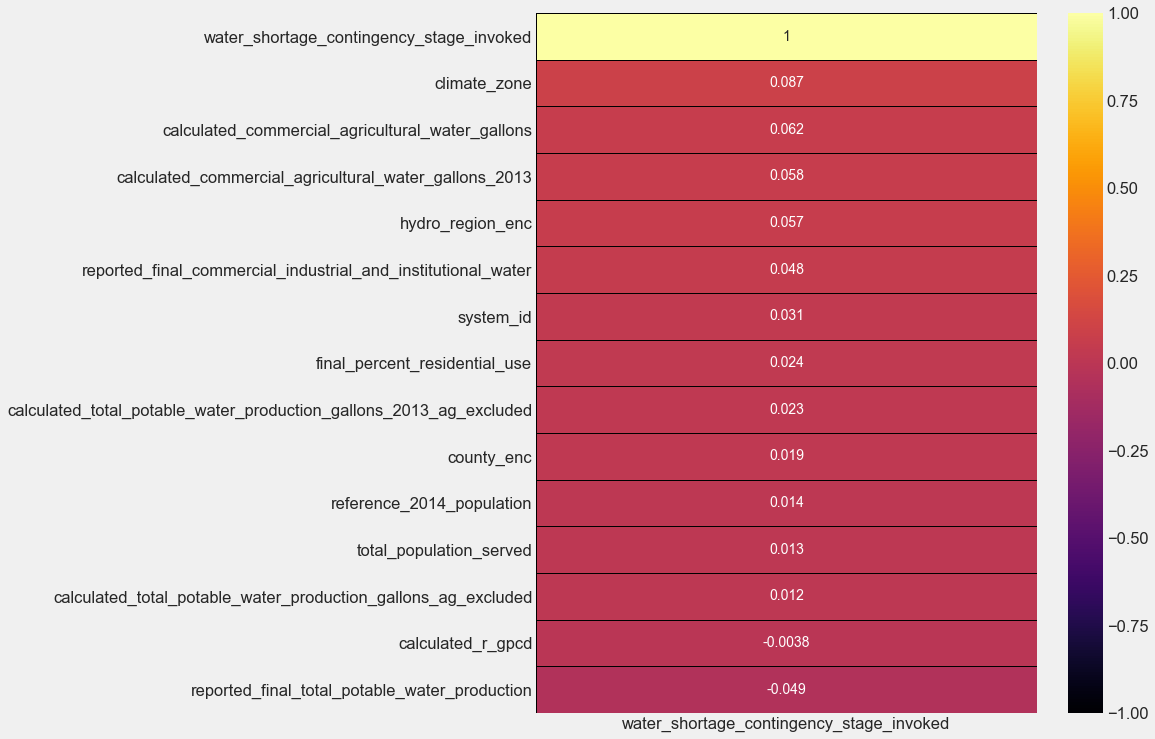

In [36]:
plt.figure(figsize=(10,12))
sns.heatmap(water.corr()[['water_shortage_contingency_stage_invoked']].sort_values(by='water_shortage_contingency_stage_invoked', ascending=False), cmap='inferno', vmin=-1, vmax=1, annot=True, linecolor='black', linewidths=1);

Was suprised to see how weak the correlation for water_shortage_contingency_stage_invoked was to every feature in the data. My goal with this dataset was to test for either total or per-capita water producted and then infer how effective the conservation stages (see the [README](https://github.com/rylandWayne/GA-DSI_Capstone_Project/blob/main/README.md))

In [11]:
water['water_shortage_contingency_stage_invoked'].value_counts()

1.0    9950
2.0    8569
0.0    5801
3.0    2940
4.0     497
6.0      47
5.0       4
Name: water_shortage_contingency_stage_invoked, dtype: int64

In [15]:
water['water_shortage_contingency_stage_invoked'].value_counts(normalize=True)

1.0    0.357811
2.0    0.308149
0.0    0.208609
3.0    0.105725
4.0    0.017873
6.0    0.001690
5.0    0.000144
Name: water_shortage_contingency_stage_invoked, dtype: float64

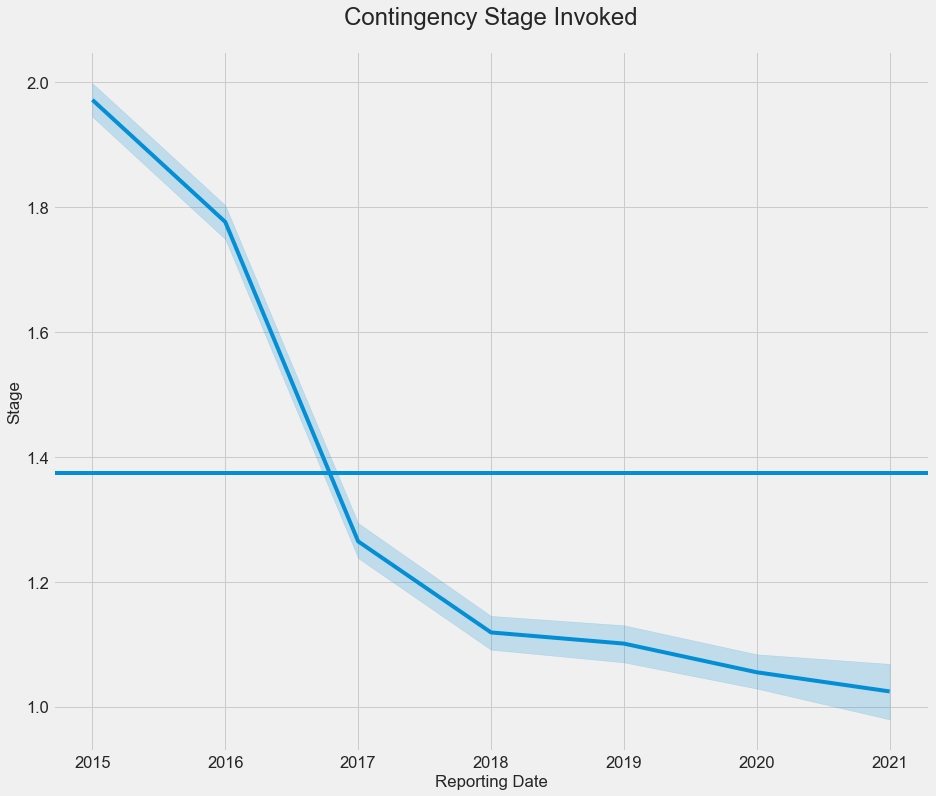

In [48]:
plt.figure(figsize=(14, 12))
sns.lineplot(x=water['reporting_date'].dt.year, y=water['water_shortage_contingency_stage_invoked'],)
plt.axhline(water['water_shortage_contingency_stage_invoked'].mean())
plt.xlabel('Reporting Date')
plt.ylabel('Stage')
plt.title('Contingency Stage Invoked', fontsize=24, y=1.03);

As the drought has prolonged, the state has even been decreasing the overall levels of conservation stages applied across the state 

In [ ]:
plt.figure(figsize=(14, 12))
sns.lineplot(x=water['reporting_date'].dt.year, y=water['water_shortage_contingency_stage_invoked'],)
plt.axhline(water['water_shortage_contingency_stage_invoked'].mean())
plt.xlabel('Reporting Date')
plt.ylabel('Calculated R-GPCD')
plt.title('Calculated RGPCD', fontsize=24, y=1.03);

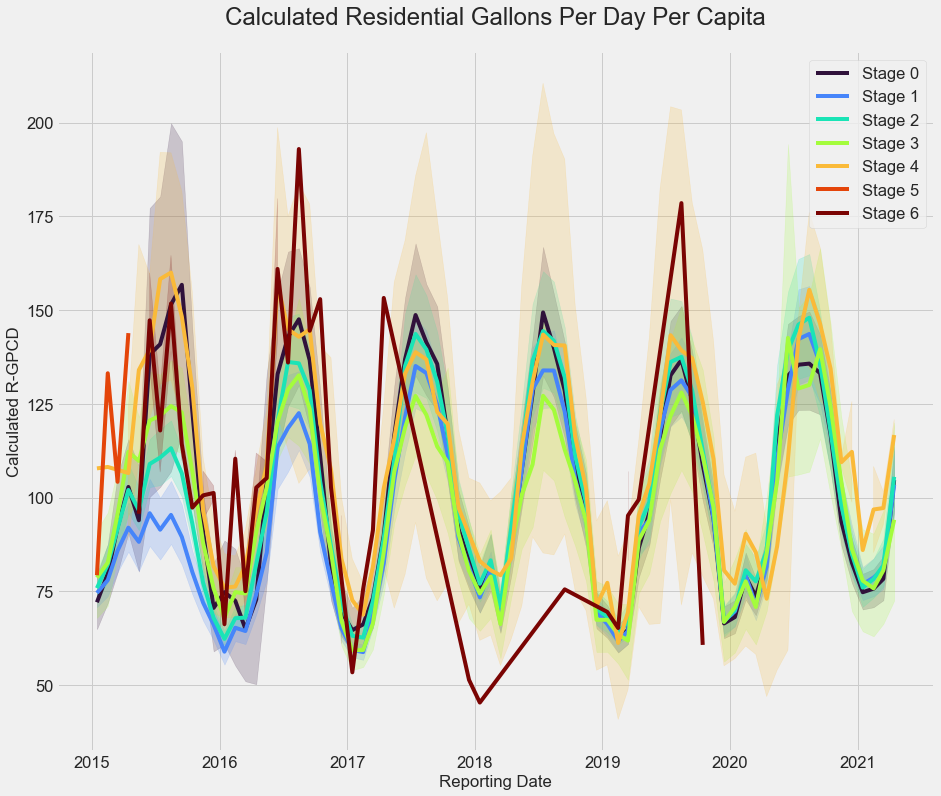

In [16]:
plt.figure(figsize=(14, 12))
sns.lineplot(data=water, x='reporting_date', y='calculated_r_gpcd',
            hue='water_shortage_contingency_stage_invoked', palette='turbo', legend=False)
# plt.axhline(water['calculated_total_potable_water_production_gallons_ag_excluded'].mean())
plt.legend([f"Stage {x}" for x in range(7)])
plt.xlabel('Reporting Date')
plt.ylabel('Calculated R-GPCD')
plt.title('Calculated Residential Gallons Per Day Per Capita', fontsize=24, y=1.03);

Production per-capita looks extremely steady at the more common contingency stages, there's some more variation in the higher stages but as seen in the groupy results above, they're almost never invoked 

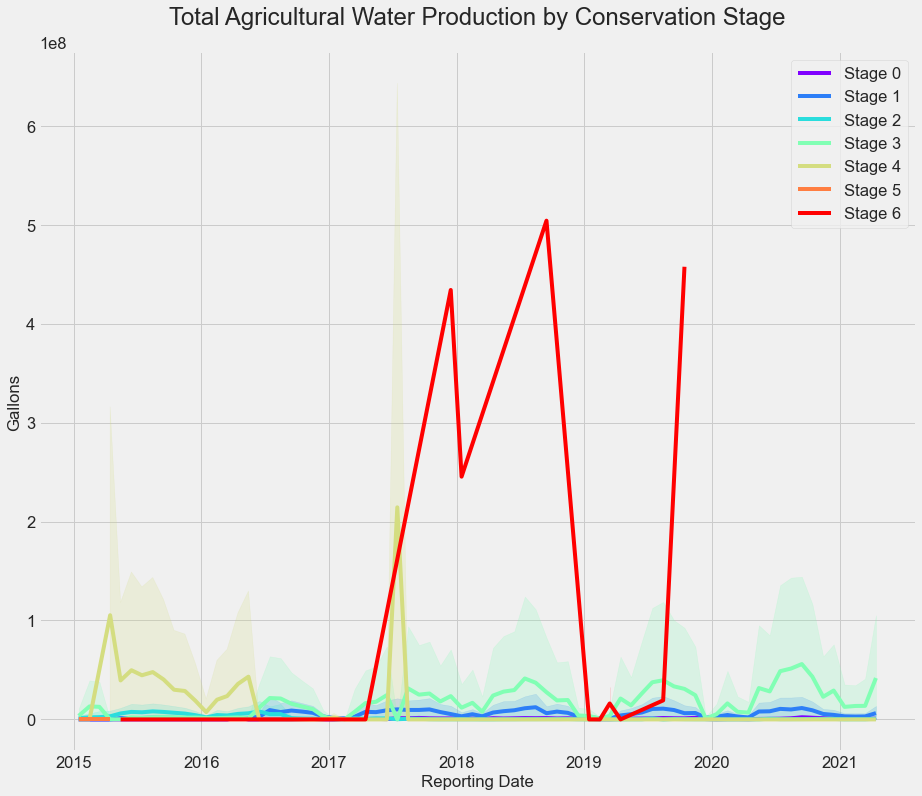

In [18]:
plt.figure(figsize=(14, 12))
sns.lineplot(data=water, x='reporting_date', y='calculated_commercial_agricultural_water_gallons',
            hue='water_shortage_contingency_stage_invoked', palette='rainbow', legend=False)
plt.xlabel('Reporting Date')
plt.ylabel('Gallons')
plt.legend([f"Stage {x}" for x in range(7)])
plt.title('Total Agricultural Water Production by Conservation Stage', fontsize=24, y=1.03);

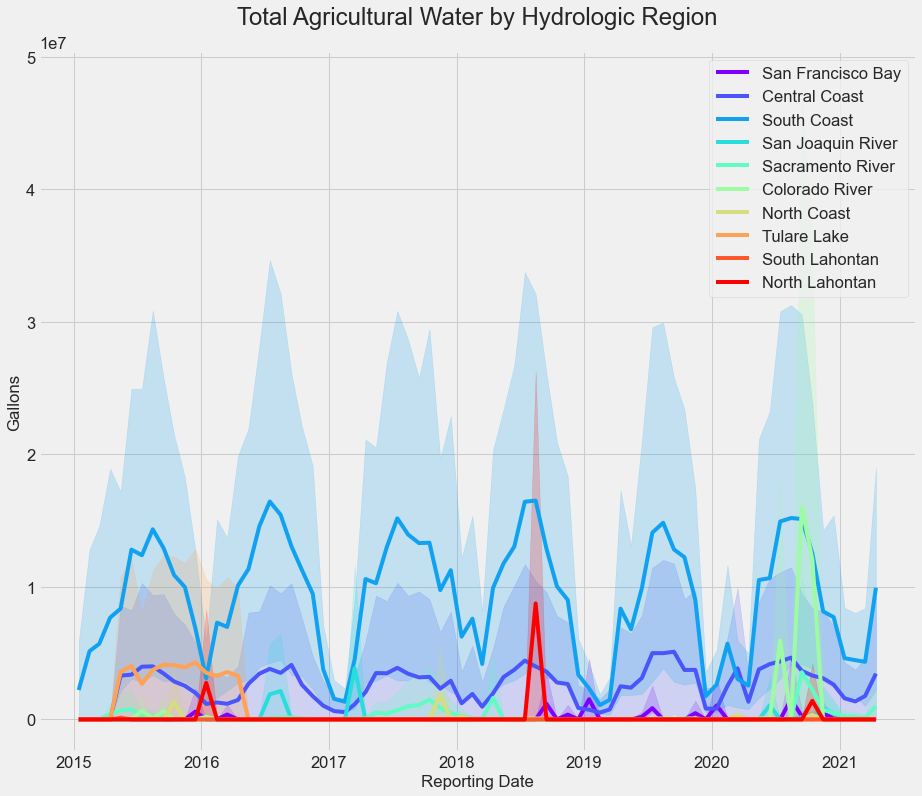

In [19]:
plt.figure(figsize=(14, 12))
sns.lineplot(data=water, x='reporting_date', y='calculated_commercial_agricultural_water_gallons',
            hue='hydro_region_enc', palette='rainbow', legend=False)
plt.legend(hydro_regions['hydrologic_region'].to_dict().values())
plt.xlabel('Reporting Date')
plt.ylabel('Gallons')
plt.title('Total Agricultural Water by Hydrologic Region', fontsize=24, y=1.03);

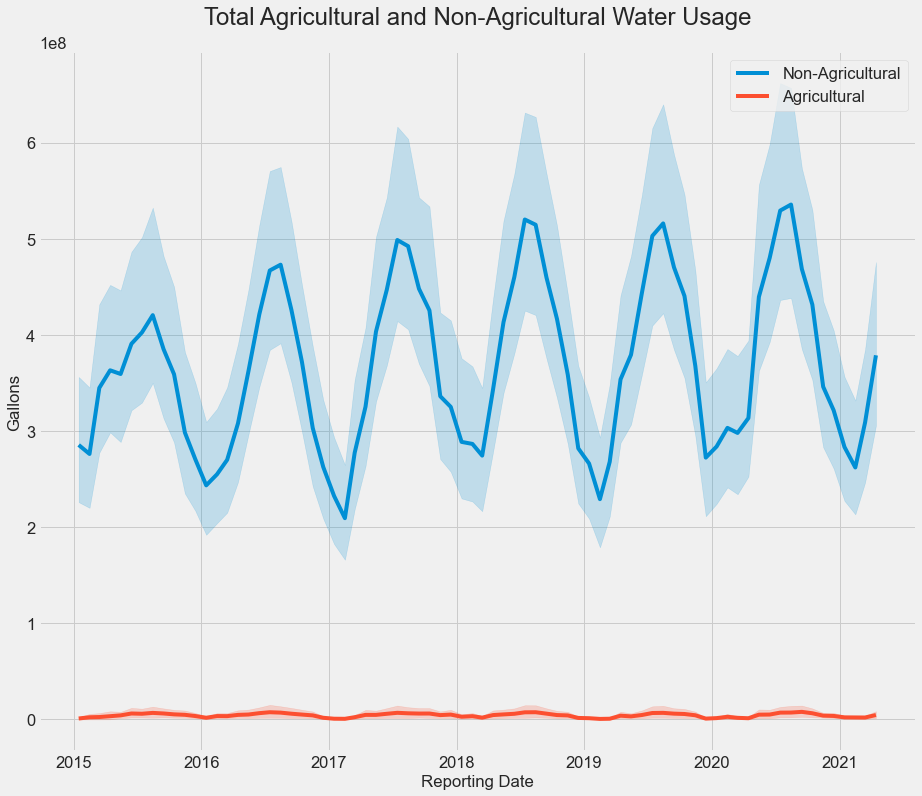

In [21]:
plt.figure(figsize=(14, 12))
sns.lineplot(x=water['reporting_date'], y=water['calculated_total_potable_water_production_gallons_ag_excluded'],)
sns.lineplot(x=water['reporting_date'], y=water['calculated_commercial_agricultural_water_gallons'],)
plt.xlabel('Reporting Date')
plt.ylabel('Gallons')
plt.legend(['Non-Agricultural', 'Agricultural'])
plt.title('Total Agricultural and Non-Agricultural Water Usage', fontsize=24, y=1.03);

The total agricultural usage above is a fraction of the total potable water excluding agriculture. Most sources estimate California's agricultural water usage at 4:1 urban and residential use, so this will require more investiation to find a dataset that accounts for that 

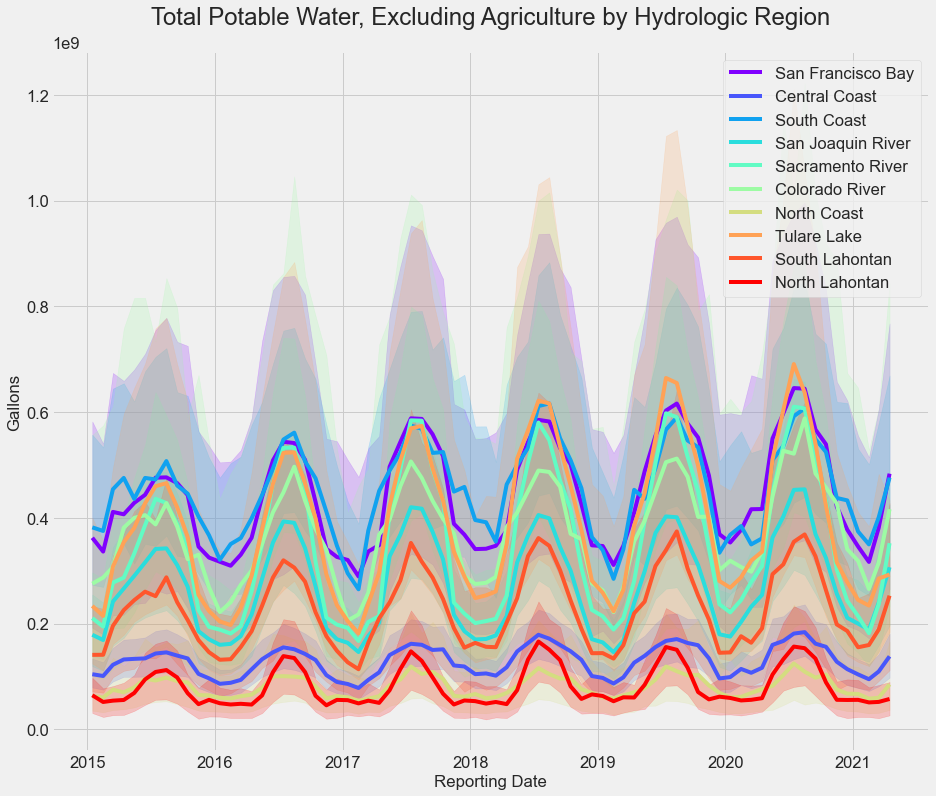

In [17]:
plt.figure(figsize=(14, 12))
sns.lineplot(data=water, x='reporting_date', y='calculated_total_potable_water_production_gallons_ag_excluded',
            hue='hydro_region_enc', palette='rainbow', legend=False)
plt.legend(hydro_regions['hydrologic_region'].to_dict().values())
plt.xlabel('Reporting Date')
plt.ylabel('Gallons')
plt.title('Total Potable Water, Excluding Agriculture by Hydrologic Region', fontsize=24, y=1.03);

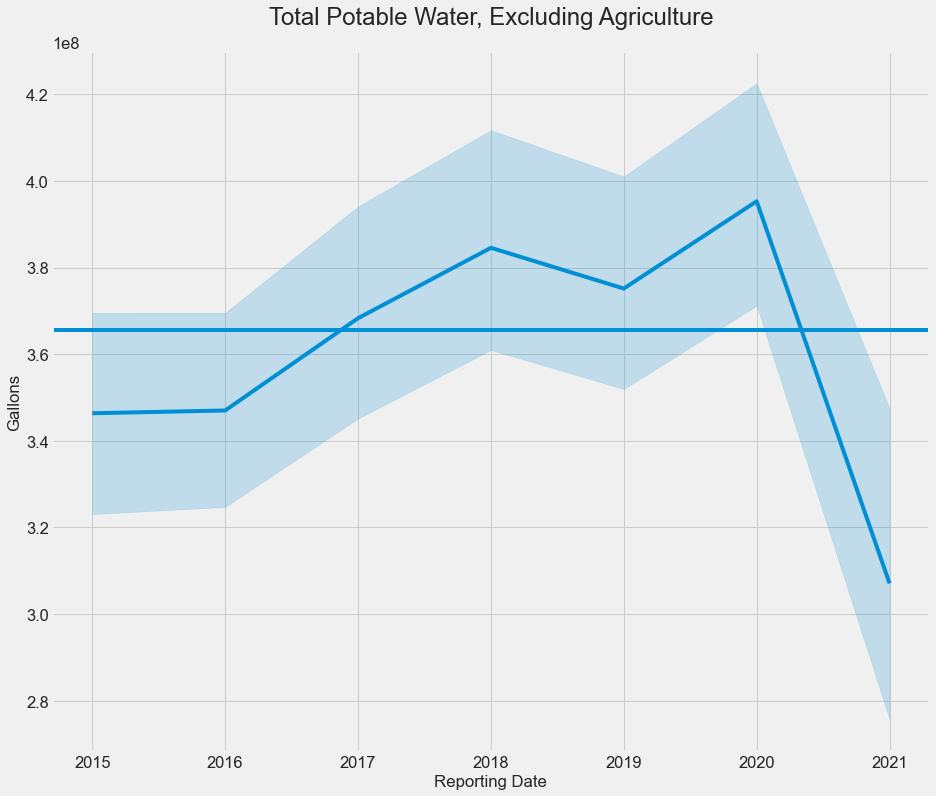

In [20]:
plt.figure(figsize=(14, 12))
sns.lineplot(x=water['reporting_date'].dt.year, y=water['calculated_total_potable_water_production_gallons_ag_excluded'],)
plt.xlabel('Reporting Date')
plt.ylabel('Gallons')
plt.axhline(water['calculated_total_potable_water_production_gallons_ag_excluded'].mean())
plt.title('Total Potable Water, Excluding Agriculture', fontsize=24, y=1.03);

2021 is just lower because we haven't gone through the whole year yet. It could continue a slight upward trend but that can't be concluded now

Was suprised to see per-capita production so steady across multiple conservation stages, and have started doing other research on agricultural sources of water

---
## Water Conservation Compliance 
---

In [22]:
conserve['supplier_name'].nunique()

389

In [24]:
water['system_id'].nunique()

413

In [26]:
water.groupby('system_id')['total_population_served'].median().sum()

36616419.5

In [27]:
conserve.pop_served.sum()

35266293

In [25]:
conserve.pop_served.sum() / water.groupby('system_id')['total_population_served'].median().sum()

0.9631278394109506

Looks like 24 of the suppliers aren't accounted for in the conservation compliance dataset, but it covers over 96% of the population served 

In [28]:
conserve.hydrologic_region.value_counts()

2    171
0     44
4     41
1     32
7     29
3     26
8     17
6     14
5     11
9      4
Name: hydrologic_region, dtype: int64

In [32]:
conserve['self_cert'].value_counts()

1    361
0     28
Name: self_cert, dtype: int64

In [33]:
conserve['self_cert'].value_counts(normalize=True)

1    0.928021
0    0.071979
Name: self_cert, dtype: float64

In [34]:
conserve.groupby('self_cert')['r_gpcd_2016'].median()

self_cert
0     93.05
1    118.70
Name: r_gpcd_2016, dtype: float64

In [35]:
conserve.groupby('self_cert')['missed_standard_by'].median()

self_cert
0    -8.9
1   -19.1
Name: missed_standard_by, dtype: float64

In [30]:
conserve.groupby('self_cert')['pop_served'].sum()

self_cert
0     1012552
1    34253741
Name: pop_served, dtype: int64

In [31]:
conserve.groupby('self_cert')['pop_served'].mean()

self_cert
0    36162.571429
1    94885.709141
Name: pop_served, dtype: float64

So only about 7% of suppliers are monitored directly, all the rest self certify their conservation efforts. Although the monitored suppliers appear to be about twice as effective at meeting their conservation goals, they also cover populations that are on average about one third the size of the self certified suppliers

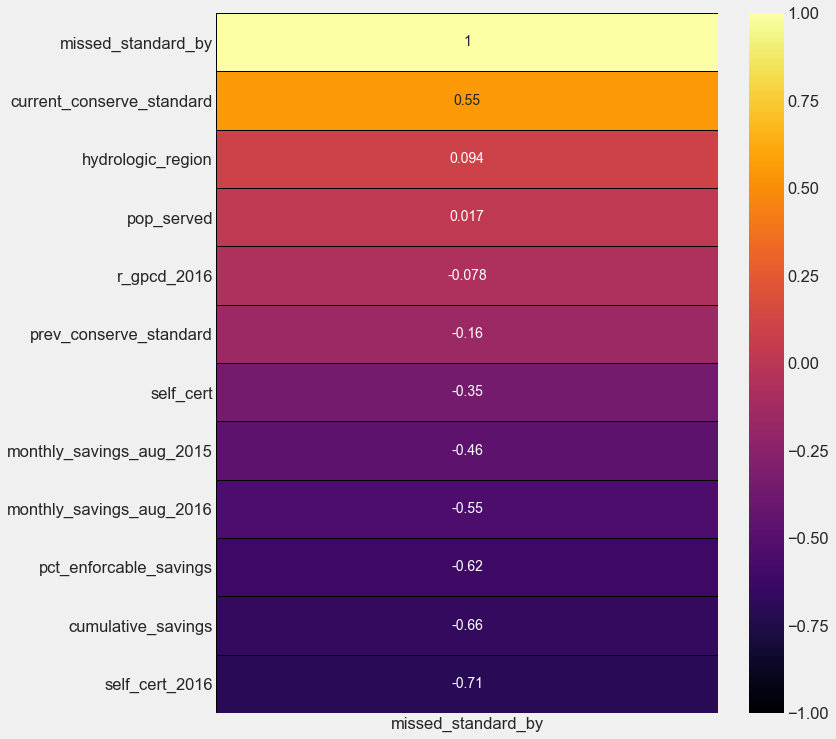

In [39]:
plt.figure(figsize=(10,12))
sns.heatmap(conserve.corr()[['missed_standard_by']].sort_values(by='missed_standard_by', ascending=False), cmap='inferno', vmin=-1, vmax=1, annot=True, linecolor='black', linewidths=1);

Looking at what correlates with with percent a supplier missed their conservation standard by, self certification appears to be one of the weaker correlations

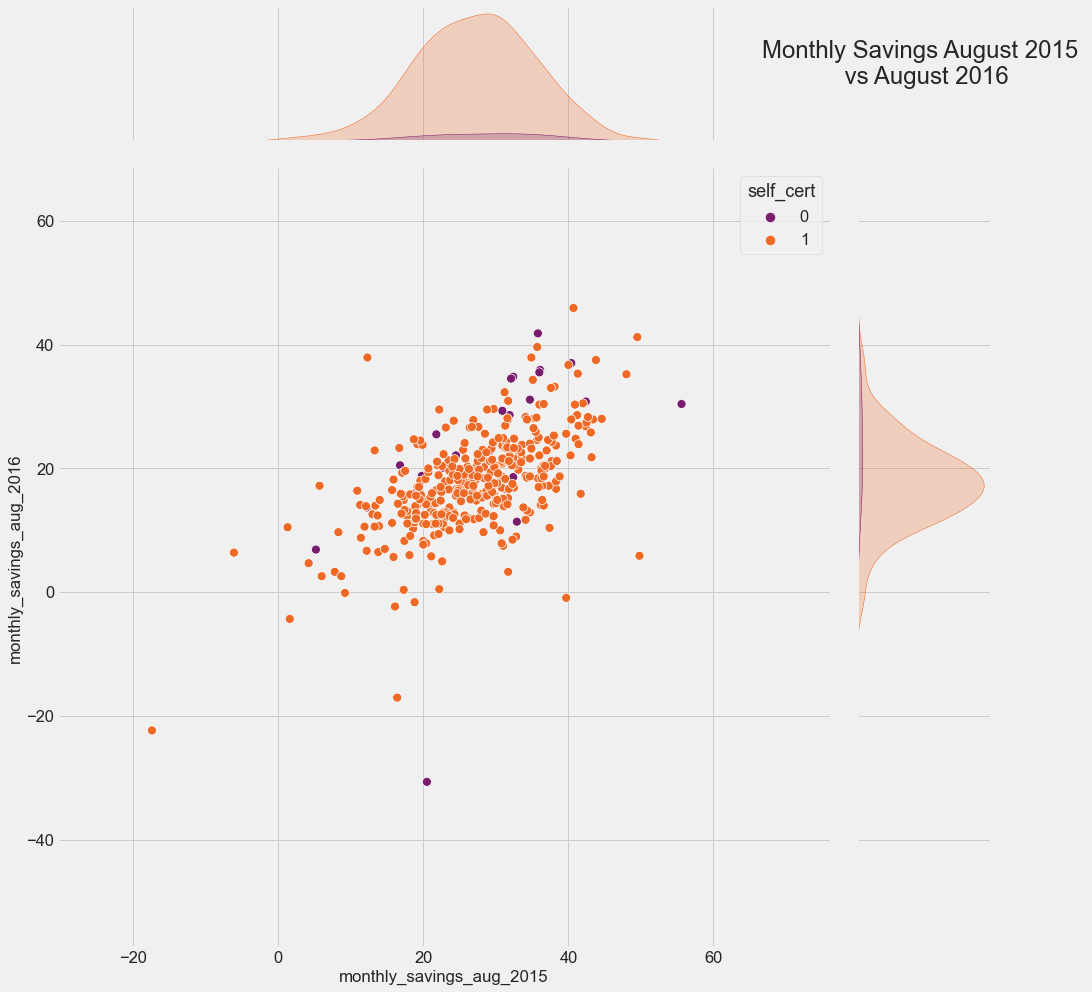

In [41]:
sns.jointplot(data=conserve, x='monthly_savings_aug_2015', y='monthly_savings_aug_2016',
              hue='self_cert', palette='inferno', height=14)
plt.title('Monthly Savings August 2015 \n vs August 2016', fontsize=24, y=1.1);

Monitored suppliers seem to have a slightly better monthly savinngs year over year, but there is still a lot of variance among those very few data points

Since self certification did seem to have some correlation, it will be worth doing some model training to see how it's handled by steep regularization penalties

In [45]:
conserve.sort_values(by='missed_standard_by')[:25]

,supplier_name,hydrologic_region,prev_conserve_standard,current_conserve_standard,self_cert,pct_enforcable_savings,self_cert_2016,cumulative_savings,missed_standard_by,monthly_savings_aug_2015,monthly_savings_aug_2016,r_gpcd_2016,pop_served
388,Rainbow Municipal Water District,2,28.0,0.0,1,48.4,47.9,47.9,-47.9,38.8,18.7,278.0,19495
387,Menlo Park City of,0,16.0,0.0,1,40.7,39.7,39.7,-39.7,49.5,41.2,100.9,16066
386,Del Oro Water Company,4,21.0,0.0,1,38.0,39.7,39.7,-39.7,43.8,37.5,89.4,9546
385,California Water Service Company Antelope Valley,8,32.0,0.0,1,48.1,38.8,38.8,-38.8,38.0,25.3,234.5,3406
383,California Water Service Company Selma,7,30.0,0.0,1,39.2,38.0,38.0,-38.0,40.0,36.7,153.3,25194
384,Benicia City of,0,20.0,0.0,1,41.0,38.0,38.0,-38.0,34.9,37.9,83.2,28086
382,North Coast County Water District,0,8.0,0.0,1,28.7,37.8,37.8,-37.8,35.7,39.6,49.0,39000
381,Patterson City of,3,25.0,0.0,1,34.0,36.7,36.7,-36.7,31.2,32.3,114.9,22590
380,Merced City of,3,34.0,0.0,1,37.7,36.4,36.4,-36.4,41.3,35.3,208.4,83400
379,Paradise Irrigation District,4,33.0,0.0,1,36.4,34.3,34.3,-34.3,44.6,28.0,206.1,26032


In [46]:
conserve.sort_values(by='missed_standard_by')[:25]['hydrologic_region'].value_counts()

0    7
4    5
2    4
3    3
7    2
1    2
8    1
6    1
Name: hydrologic_region, dtype: int64